# 니켈 

In [24]:
import requests
import json
import pandas as pd

## 제안배경
* 관련 현황 및 문제점 등 빅데이터 분석을 구상하고 제안한 배경에 대해서 작성 (활용 분야, 활용빈도, 중요성 등)

(1) 니켈은 배터리 및 연료전지 소재, 다양한 촉매, 태양광 지지대의 도금, 내부식성이 필요한 해양구조물 등에 사용 (재생에너지, 친황경자동차 분야에 필수적)

(2) 니켈의 국가별 소비량은 급증하고 있음 (보고서는 하단의 시각화 그래프만 사용)
  * 4차 핵심사업에 소요되는 광물로 2011년 대비 소비량 약 2배 증가

In [39]:
# 한국광해광업공단_광종별 소비현황에 대한 주소를 하단 `데이터 현황`에서 url부분에 붙여넣기
url = 'https://raw.githubusercontent.com/KR9268/db_datagokr/main/komir_consume.csv'
df_consume = pd.read_csv(url, encoding='cp949', low_memory=False)
df_consume_nickel = df_consume[df_consume['광종']=='니켈']
df_consume_nickel.head()

,2011 소비량,2012 소비량,2013 소비량,2014 소비량,2015 소비량,2016 소비량,2017 소비량,2018 소비량,2019 소비량,2020 소비량,2021 소비량,2022 소비량,2023 소비량,광종,국가,단위,대륙,품목
224,9.334,8.391,7.965,7.571,6.667,7.021,8.423,7.978,9.052,10.016,6.101,7.152,8.386,니켈,Austria,천톤,EUROPE,refined
225,29.794,18.827,26.000,29.129,35.022,31.415,29.080,34.137,35.190,33.392,34.046,25.826,34.825,니켈,Belgium,천톤,EUROPE,refined
226,0.157,0.125,0.141,0.137,0.167,0.120,0.114,0.134,0.149,0.179,0.211,0.185,0.149,니켈,Bulgaria,천톤,EUROPE,refined
227,3.595,1.891,0.410,3.011,2.882,2.997,2.870,2.163,2.223,2.000,2.297,1.513,1.827,니켈,Czech Republic,천톤,EUROPE,refined
228,0.046,0.189,0.063,0.056,0.242,0.372,0.346,0.589,0.544,0.397,0.269,0.560,0.517,니켈,Denmark,천톤,EUROPE,refined


In [37]:
# 단위가 여럿인 경우 등 확인 후 통일
for each_column in df_consume_nickel.columns:
    if '소비량' not in each_column:
        print(f"{each_column} : {df_consume_nickel[each_column].unique()}")

광종 : ['니켈']
국가 : ['Austria' 'Belgium' 'Bulgaria' 'Czech Republic' 'Denmark' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Italy' 'Macedonia' 'Norway'
 'Poland' 'Portugal' 'Romania' 'Russia' 'Serbia' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'Ukraine' 'United Kingdom' 'South Africa' 'China'
 'Hong Kong' 'India' 'Indonesia' 'Japan' 'Kazakhstan' 'Malaysia'
 'North Korea' 'Philippines' 'Saudi Arabia' 'Singapore' 'South Korea'
 'Taiwan' 'Thailand' 'Turkey' 'United Arab Emirates' 'Vietnam' 'Argentina'
 'Brazil' 'Canada' 'Chile' 'Cuba' 'Mexico' 'U.S.A.' 'Australia'
 'New Zealand']
단위 : ['천톤']
대륙 : ['EUROPE' 'AFRICA' 'ASIA' 'AMERICA' 'OCEANIA']
품목 : ['refined']


In [41]:
# 단일 항목인 광종, 단위, 품목 제거 (메모리확보 7.6+ KB → 6.4+ KB)
df_consume_nickel = df_consume_nickel[['2011 소비량', '2012 소비량', '2013 소비량', '2014 소비량', '2015 소비량', '2016 소비량',
       '2017 소비량', '2018 소비량', '2019 소비량', '2020 소비량', '2021 소비량', '2022 소비량', '2023 소비량', '국가', '대륙']]
df_consume_nickel.head()

,2011 소비량,2012 소비량,2013 소비량,2014 소비량,2015 소비량,2016 소비량,2017 소비량,2018 소비량,2019 소비량,2020 소비량,2021 소비량,2022 소비량,2023 소비량,국가,대륙
224,9.334,8.391,7.965,7.571,6.667,7.021,8.423,7.978,9.052,10.016,6.101,7.152,8.386,Austria,EUROPE
225,29.794,18.827,26.000,29.129,35.022,31.415,29.080,34.137,35.190,33.392,34.046,25.826,34.825,Belgium,EUROPE
226,0.157,0.125,0.141,0.137,0.167,0.120,0.114,0.134,0.149,0.179,0.211,0.185,0.149,Bulgaria,EUROPE
227,3.595,1.891,0.410,3.011,2.882,2.997,2.870,2.163,2.223,2.000,2.297,1.513,1.827,Czech Republic,EUROPE
228,0.046,0.189,0.063,0.056,0.242,0.372,0.346,0.589,0.544,0.397,0.269,0.560,0.517,Denmark,EUROPE


* 전체 소비량 증가

Text(0.5, 1.0, '니켈 소비량 추이')

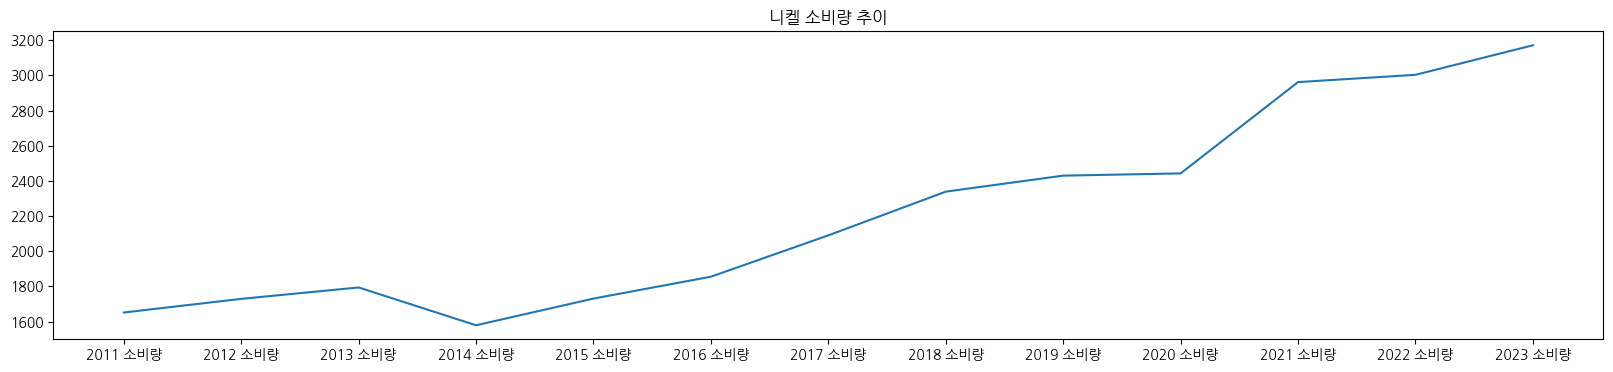

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(20,4))
sns.lineplot(df_consume_nickel.sum(numeric_only=True))
plt.title('니켈 소비량 추이')

* 국가별 소비량 증가
  * 중국, 인도네시아를 중심으로 2011년 대비 소비량 대폭 증가

In [187]:
nickel_by_country = df_consume_nickel.groupby('국가').sum(numeric_only=True)
nickel_by_country

,2011 소비량,2012 소비량,2013 소비량,2014 소비량,2015 소비량,2016 소비량,2017 소비량,2018 소비량,2019 소비량,2020 소비량,2021 소비량,2022 소비량,2023 소비량
국가,,,,,,,,,,,,,
Argentina,0.974,0.806,0.892,0.501,0.528,0.475,0.535,0.523,0.526,0.274,0.544,0.443,0.452
Australia,1.600,1.600,1.600,1.600,1.608,1.600,1.600,1.600,1.600,1.600,1.600,1.600,1.600
Austria,9.334,8.391,7.965,7.571,6.667,7.021,8.423,7.978,9.052,10.016,6.101,7.152,8.386
Belgium,29.794,18.827,26.000,29.129,35.022,31.415,29.080,34.137,35.190,33.392,34.046,25.826,34.825
Brazil,26.910,22.455,21.180,26.616,18.062,25.506,22.269,22.376,16.480,12.062,17.697,17.782,11.645
Bulgaria,0.157,0.125,0.141,0.137,0.167,0.120,0.114,0.134,0.149,0.179,0.211,0.185,0.149
Canada,4.261,4.677,4.902,13.644,10.119,11.042,6.756,6.833,5.754,5.290,5.714,7.557,6.058
Chile,0.105,0.054,0.112,0.105,0.099,0.080,0.095,0.118,0.115,0.102,0.062,0.124,0.057
China,702.597,804.920,909.200,654.118,843.149,897.659,982.018,1096.418,1304.292,1415.717,1651.338,1747.482,2050.164


In [189]:
# 표준편차가 상위 10개 국가 추출
described_nickel_by_country = nickel_by_country.transpose().describe()
std_described_nickel_by_country = described_nickel_by_country.loc['std'].sort_values(ascending=False)[0:10]
std_described_nickel_by_country

국가
China           440.092028
Indonesia       154.306424
India            18.577287
U.S.A.           16.972706
Taiwan           16.607094
South Africa     12.951598
Germany          12.118787
Japan             9.753820
South Korea       9.739035
Italy             9.129311
Name: std, dtype: float64

<Axes: >

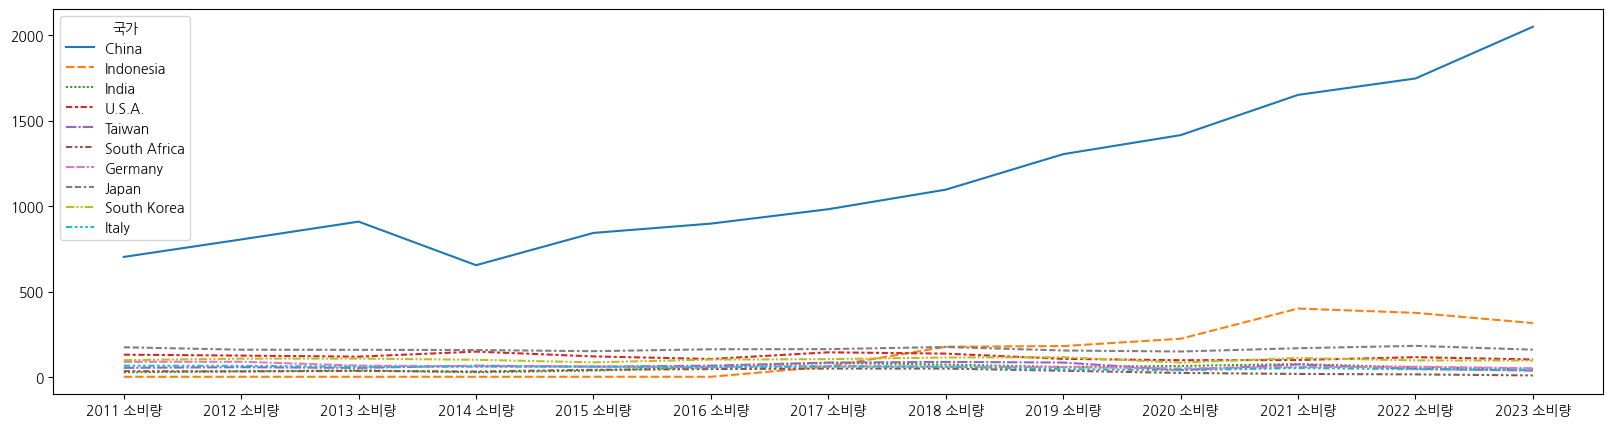

In [196]:
# 표준편차 상위 10개국 그래프
index_country = std_described_nickel_by_country.index.tolist()

plt.figure(figsize=(20,5))
sns.lineplot(nickel_by_country.transpose()[index_country])

<Axes: >

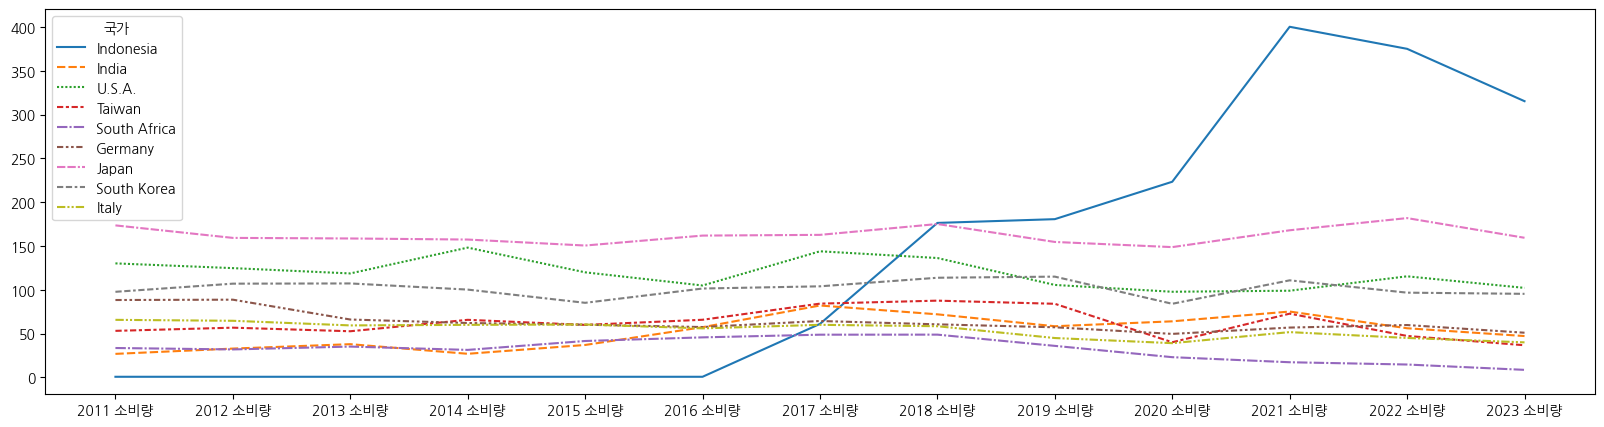

In [198]:
# 표준편차 상위 10개국 중 중국제외한 그래프
index_country.remove('China')

plt.figure(figsize=(20,5))
sns.lineplot(nickel_by_country.transpose()[index_country])

<Axes: >

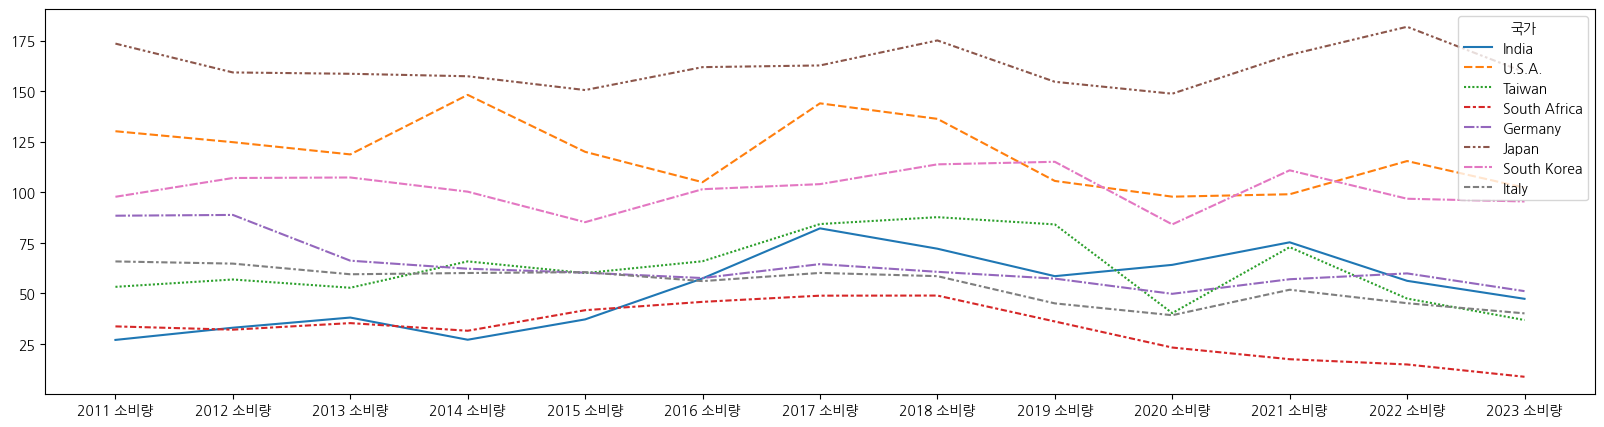

In [199]:
# 표준편차 상위 10개국 중 인도네시아 제외한 그래프
index_country.remove('Indonesia')

plt.figure(figsize=(20,5))
sns.lineplot(nickel_by_country.transpose()[index_country])

(3) 니켈의 생산량
* 주요 2개국 생산량이 58.3%로 편중(인도네시아, 중국, Refined니켈 기준)

In [202]:
# 한국광해광업공단_광종별 소비현황에 대한 주소를 하단 `데이터 현황`에서 url부분에 붙여넣기
url = 'https://raw.githubusercontent.com/KR9268/db_datagokr/main/komir_product_country.csv'
df_product = pd.read_csv(url, encoding='cp949', low_memory=False)
df_product.head()

,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량,광종,국가,단위,대륙,품목
0,561.354,800.316,657.1,605.215,787.404,738.612,740.380,760.244,1043.343,619.748,675.269,669.926,542.114,알루미늄,Bosnia,천톤,EUROPE,bauxite
1,0.000,0.000,0.0,0.000,11.900,9.800,12.200,11.800,14.300,14.100,14.500,13.800,13.800,알루미늄,Croatia,천톤,EUROPE,bauxite
2,80.800,90.129,100.0,71.100,70.000,110.000,110.000,110.000,120.760,123.496,142.764,120.000,120.000,알루미늄,France,천톤,EUROPE,bauxite
3,2324.000,1815.328,1844.0,1876.000,1831.270,1880.000,1927.145,1559.360,1379.123,1428.639,1227.000,1173.000,869.100,알루미늄,Greece,천톤,EUROPE,bauxite
4,277.800,255.100,93.7,14.400,8.300,16.700,4.000,5.000,0.000,0.000,0.000,0.000,0.000,알루미늄,Hungary,천톤,EUROPE,bauxite


In [204]:
df_nickel_product = df_product[df_product['광종']=='니켈']
df_nickel_product

,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량,광종,국가,단위,대륙,품목
442,3.528,0.728,2.086,4.889,6.309,3.952,5.301,4.204,2.830,3.764,3.615,1.423,0.548,니켈,Albania,천톤,EUROPE,mine
443,19.081,19.955,19.579,19.830,10.643,22.034,36.201,43.572,38.530,41.429,42.098,60.360,69.568,니켈,Finland,천톤,EUROPE,mine
444,21.100,21.550,19.350,21.410,19.750,19.394,19.080,17.890,13.715,7.060,4.755,1.680,0.000,니켈,Greece,천톤,EUROPE,mine
445,7.632,4.436,7.607,6.724,6.650,4.306,7.120,4.791,3.314,3.958,4.735,0.339,0.360,니켈,Kosovo,천톤,EUROPE,mine
446,3.600,1.704,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,니켈,Macedonia,천톤,EUROPE,mine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,13.498,15.186,9.400,0.000,0.000,9.913,15.632,19.214,28.450,21.316,27.320,28.400,19.424,니켈,Dominican Republic,천톤,AMERICA,refined
501,0.000,0.000,0.000,2.985,10.818,8.688,12.417,14.688,20.323,22.894,19.931,18.419,1.514,니켈,Guatemala,천톤,AMERICA,refined
502,13.400,8.100,3.261,2.500,4.851,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,니켈,Venezuela,천톤,AMERICA,refined
503,110.213,125.634,141.252,137.762,152.978,120.520,108.500,114.517,106.470,115.800,98.970,96.500,92.300,니켈,Australia,천톤,OCEANIA,refined


In [205]:
# 단위가 여럿인 경우 등 확인 후 통일
for each_column in df_nickel_product.columns:
    if '생산량' not in each_column:
        print(f"{each_column} : {df_nickel_product[each_column].unique()}")

광종 : ['니켈']
국가 : ['Albania' 'Finland' 'Greece' 'Kosovo' 'Macedonia' 'Norway' 'Poland'
 'Russia' 'Spain' 'Botswana' 'Ivory Coast' 'Madagascar' 'Morocco'
 'South Africa' 'Zambia' 'Zimbabwe' 'China' 'Indonesia' 'Kazakhstan'
 'Myanmar' 'Philippines' 'Turkey' 'Vietnam' 'Brazil' 'Canada' 'Colombia'
 'Cuba' 'Dominican Republic' 'Guatemala' 'U.S.A.' 'Venezuela' 'Australia'
 'New Caledonia' 'Papua New Guinea' 'Austria' 'France' 'Ukraine'
 'United Kingdom' 'India' 'Japan' 'South Korea']
단위 : ['천톤']
대륙 : ['EUROPE' 'AFRICA' 'ASIA' 'AMERICA' 'OCEANIA']
품목 : ['mine' 'refined']


In [208]:
# 단일 항목인 광종, 단위, 품목 제거 (메모리확보 9.4+ KB → 8.4+ KB)
df_nickel_product = df_nickel_product[['2011 생산량', '2012 생산량', '2013 생산량', '2014 생산량', '2015 생산량', '2016 생산량',
       '2017 생산량', '2018 생산량', '2019 생산량', '2020 생산량', '2021 생산량', '2022 생산량', '2023 생산량', '국가', '대륙','품목']]
df_nickel_product.head()

,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량,국가,대륙,품목
442,3.528,0.728,2.086,4.889,6.309,3.952,5.301,4.204,2.830,3.764,3.615,1.423,0.548,Albania,EUROPE,mine
443,19.081,19.955,19.579,19.830,10.643,22.034,36.201,43.572,38.530,41.429,42.098,60.360,69.568,Finland,EUROPE,mine
444,21.100,21.550,19.350,21.410,19.750,19.394,19.080,17.890,13.715,7.060,4.755,1.680,0.000,Greece,EUROPE,mine
445,7.632,4.436,7.607,6.724,6.650,4.306,7.120,4.791,3.314,3.958,4.735,0.339,0.360,Kosovo,EUROPE,mine
446,3.600,1.704,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Macedonia,EUROPE,mine


In [221]:
# 니켈에 대한 국가별 생산량
df2_produce_country_mine = df_nickel_product[df_nickel_product['품목']=='mine'].groupby(by=['국가'])[['2011 생산량', '2012 생산량', '2013 생산량', '2014 생산량', '2015 생산량', '2016 생산량',
       '2017 생산량', '2018 생산량', '2019 생산량', '2020 생산량', '2021 생산량', '2022 생산량', '2023 생산량']].sum()
df2_produce_country_refined = df_nickel_product[df_nickel_product['품목']=='refined'].groupby(by=['국가'])[['2011 생산량', '2012 생산량', '2013 생산량', '2014 생산량', '2015 생산량', '2016 생산량',
       '2017 생산량', '2018 생산량', '2019 생산량', '2020 생산량', '2021 생산량', '2022 생산량', '2023 생산량']].sum()

In [223]:
# 니켈에 대한 국가별 생산량의 총 합계(Mine)
df2_produce_country_total_mine = df2_produce_country_mine[['2011 생산량', '2012 생산량', '2013 생산량', '2014 생산량', '2015 생산량', '2016 생산량',
       '2017 생산량', '2018 생산량', '2019 생산량', '2020 생산량', '2021 생산량', '2022 생산량', '2023 생산량']].sum(axis=1).sort_values(ascending=False)
df2_produce_country_total_mine[0:10]

국가
Indonesia        9543.539
Philippines      4762.154
Russia           3057.635
Australia        2612.548
New Caledonia    2453.547
Canada           2448.002
China            1274.216
Brazil            988.699
Cuba              680.208
South Africa      561.815
dtype: float64

In [224]:
# 니켈에 대한 국가별 생산량의 총 합계(Refined)
df2_produce_country_total_refined = df2_produce_country_refined[['2011 생산량', '2012 생산량', '2013 생산량', '2014 생산량', '2015 생산량', '2016 생산량',
       '2017 생산량', '2018 생산량', '2019 생산량', '2020 생산량', '2021 생산량', '2022 생산량', '2023 생산량']].sum(axis=1).sort_values(ascending=False)
df2_produce_country_total_refined[0:10]

국가
China            8813.411
Indonesia        5204.761
Russia           2458.088
Japan            2295.233
Canada           1742.140
Australia        1521.416
Norway           1178.114
New Caledonia     936.948
Brazil            809.897
Finland           712.412
dtype: float64

Text(0.5, 1.0, '국가별 니켈 총생산량 비중(2011~2023,  Refined)')

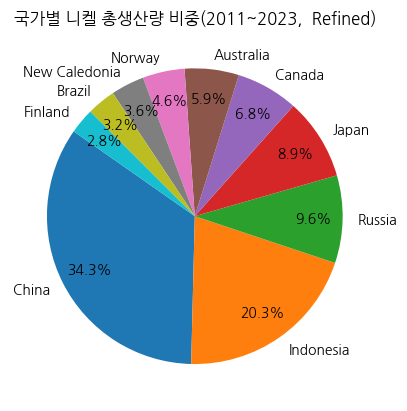

In [226]:
# 니켈 총생산량 내림차순 기준 상위 10개국 Pie chart
target_country =df2_produce_country_total_refined[0:10][0:10].index.tolist()
df2_produce_country_total_refined.loc[target_country].plot(kind='pie',startangle=145, autopct='%.1f%%', pctdistance=0.8)
plt.title('국가별 니켈 총생산량 비중(2011~2023,  Refined)')

## 분석 내용 및 분석 결과

 구체적인 내용을 자유롭게 기술하되, 세부적이고 구체적으로 작성
  * 데이터 분석을 통한 PoC(Proof of Concept) 결과를 구체적으로 작성
  * 분석 알고리즘 등에 대한 세부 내용 제시
  * 솔루션의 활용처·사용법·개선점·구현 기술 등 구체적으로 작성
  (도표, 이미지, 영상 등 활용 가능)


* 아래의 상황을 모델에 포함하여 고려하고자 하였습니다
  * 생산국 수출량 : 광물의 특정 생산국 비중이 높은 점을 고려하여, 해당 국가의 광물 수출량의 이상탐지
  * 수입국 수입량 : 광물을 수입하는 타 국가의 수입량 증감을 확인하여 이상탐지
  * 생산국 판매액 : 주요 생산국의 대외 판매액을 기준으로 광물의 가격변동을 탐지
    * 기준 : FOB가격(물류나 보험료를 제외한 순수 물품가격)을 판매량으로 나누어 kg당 가격 산출
  * BDI(Baltic Dry Index) : 광물이 수입을 통해 조달된다는 점과, 광물운송은 벌크선을 통해 진행됨을 착안하여 물류문제에 대한 이상탐지 요소로 포함

In [2]:
import pandas as pd
import xlwings as xw

def filter_df(df:pd.DataFrame, from_country:str, export:bool, returnvalue:str=None, to_country:str=None):
    '''
        dataframe에서 특정 옵션 데이터를 필터링 하기 위한 함수
    '''
    flowCode = 'X' if export is True else 'M'
    filter_to_country = (df['partnerDesc']==to_country) if to_country is not None else True

    # DataFrame복사
    df_copy = df[(df['reporterDesc']==from_country) & filter_to_country & (df['flowCode']==flowCode)].copy()

    # DataFrame전처리 : 날짜값 변환(str로변환, 연/월 분리)
    df_copy['period'] = df_copy['period'].astype('int').astype('str')
    df_copy['period_year'] = df_copy['period'].str[:4]
    df_copy['period_month'] = df_copy['period'].str[-2:]
    df_copy['period_dateformat'] = pd.to_datetime(df_copy['refPeriodId'], format='%Y%m%d')

    # 반환 컬럼
    if returnvalue is not None:
        df_copy = df_copy[returnvalue]
    else:
        pass

    return df_copy

def preprocessing_kpi_uscomtrade(df:pd.DataFrame, type:str):
    df[['netWgt','primaryValue']] = df[['netWgt','primaryValue']].dropna()

    # 출발국가에 따라 기준값 세팅
    if df['reporterDesc'].unique() in ['China','Indonesia']:
        criteria_wt = 'netWgt'
        criteria_value = 'primaryValue'
    else:
        criteria_wt = 'netWgt'
        criteria_value = 'primaryValue'

    # 기간(period출력)
    #period = 'period'
    period = 'period_dateformat'

    # 산출
    if type == 'Price':
        df_return = df.groupby(period).sum(numeric_only=True)[criteria_value] / df.groupby(period).sum(numeric_only=True)[criteria_wt]
    elif type == 'ExportQty':
        df_return = df.groupby(period).sum(numeric_only=True)[criteria_wt]
    elif type == 'ImportQty':
        temp_dict = {}
        for each_country in df['partnerDesc'].unique():
            if each_country != 'World':
                temp_df = df[df['partnerDesc']==each_country]
                temp_dict[each_country] = temp_df.groupby(period).sum(numeric_only=True)['netWgt']
        return temp_dict
    
    return df_return

### 지표별 데이터 전처리(Null제거 및 기준별 Groupby 및 계산처리)
* 중국과 인도네시아의 수출가격(니켈)
* 중국과 인도네시아의 수출량(니켈)
* 국가별 수입량(니켈)

In [3]:
#wb = xw.Book('C:\\Users\\samsung\\Downloads\\282540,283324_merged.csv')
wb = xw.Book('Z:\\GoogleDrive\\공공데이터 활용 아이디어 공모전\\282540,283324_merged.csv')
sht = wb.sheets[0]
range_df = sht.range('A2:BL'+str(sht.used_range.last_cell.row))
address_master_tb = sht.used_range.options(pd.DataFrame,index=0).value
wb.close()

address_master_tb

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20110101.0,2011.0,1.0,201101.0,32.0,ARG,Argentina,M,...,1500.000,False,0.0,False,4.060111e+04,0.000,4.060111e+04,0.0,False,True
1,C,M,20110101.0,2011.0,1.0,201101.0,36.0,AUS,Australia,M,...,120.000,False,0.0,False,1.844344e+04,0.000,1.844344e+04,0.0,False,True
2,C,M,20110101.0,2011.0,1.0,201101.0,36.0,AUS,Australia,X,...,12000.000,False,0.0,False,0.000000e+00,11942.675,1.194267e+04,0.0,False,True
3,C,M,20110101.0,2011.0,1.0,201101.0,40.0,AUT,Austria,M,...,0.000,False,0.0,False,5.477600e+02,0.000,5.477600e+02,0.0,False,True
4,C,M,20110101.0,2011.0,1.0,201101.0,56.0,BEL,Belgium,M,...,6609.260,False,0.0,False,1.813610e+05,0.000,1.813610e+05,0.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105246,C,M,20240401.0,2024.0,4.0,202404.0,392.0,JPN,Japan,X,...,90547.000,False,0.0,False,NaN,294094.768,2.940948e+05,0.0,True,False
105247,C,M,20240401.0,2024.0,4.0,202404.0,376.0,ISR,Israel,M,...,3178.379,True,0.0,False,1.800000e+04,NaN,1.800000e+04,6.0,False,True
105248,C,M,20240401.0,2024.0,4.0,202404.0,376.0,ISR,Israel,M,...,529.730,True,0.0,False,3.000000e+03,NaN,3.000000e+03,6.0,True,False
105249,C,M,20240401.0,2024.0,4.0,202404.0,376.0,ISR,Israel,M,...,2648.649,True,0.0,False,1.500000e+04,NaN,1.500000e+04,6.0,True,False


In [4]:
price_indonesia_raw = filter_df(df=address_master_tb, from_country='Indonesia', to_country=None, export=True, returnvalue=None)
price_indonesia = preprocessing_kpi_uscomtrade(price_indonesia_raw, 'Price')
export_qty_indonesia = preprocessing_kpi_uscomtrade(price_indonesia_raw, 'ExportQty')
import_qty_from_indonesia = preprocessing_kpi_uscomtrade(price_indonesia_raw, 'ImportQty')

In [6]:
price_china_raw = filter_df(df=address_master_tb, from_country='China', to_country=None, export=True, returnvalue=None)
price_china = preprocessing_kpi_uscomtrade(price_china_raw, 'Price')
export_qty_china =  preprocessing_kpi_uscomtrade(price_china_raw, 'ExportQty')
import_qty_from_china = preprocessing_kpi_uscomtrade(price_china_raw, 'ImportQty')

### 각 지표에 대해 예측수행
* 중국과 인도네시아의 수출가격(니켈) : 시계열모형 예측 
* 중국과 인도네시아의 수출량(니켈) : ??? 예측
* 국가별 수입량(니켈) : ??? 예측
* 수급안정화지수 : ??? 예측
* BDI : ??? 예측

#### 데이터 확인용 시각화

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

<Axes: xlabel='period_dateformat'>

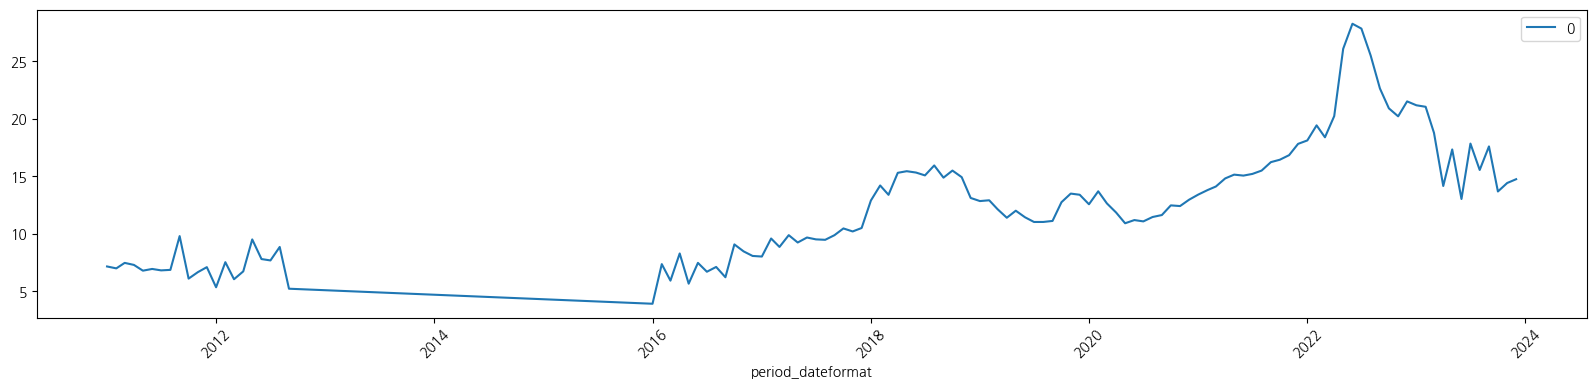

In [11]:
%matplotlib inline
datasource = pd.DataFrame(price_china)

plt.figure(figsize=(20,4))
plt.xticks(rotation=45)
#plt.gca().set_xticks(datasource.index)
sns.lineplot(datasource)

In [93]:
# 재환님이 주신 ExponentialSmoothing 모델 활용
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime
from dateutil.relativedelta import relativedelta

df = price_china

def predict_exponential(df:pd.DataFrame, month_to_expect:int):
# 모델 학습
    model = ExponentialSmoothing(df.values, trend='add', seasonal='add', seasonal_periods=12)
    fit = model.fit()

    # 예측 수행 (12개월)
    forecast = fit.forecast(steps=month_to_expect)

    # 날짜배열 생성
    months= []
    start_month = max(df.index)+ relativedelta(months=1)
    end_month = max(df.index) + relativedelta(months=month_to_expect)
    current_month = start_month
    while current_month <= end_month:
        months.append(current_month)
        current_month += relativedelta(months=1)

    # 날짜+예측값 Series 생성
    forecast = pd.Series(data=forecast, index=months)
    return forecast

forecast = predict_exponential(df=price_china, month_to_expect=12)
forecast

2024-01-01    14.324603
2024-02-01    15.397100
2024-03-01    14.578083
2024-04-01    14.589412
2024-05-01    15.382925
2024-06-01    15.244014
2024-07-01    15.578931
2024-08-01    15.535253
2024-09-01    15.241216
2024-10-01    15.326029
2024-11-01    15.416176
2024-12-01    15.462405
dtype: float64

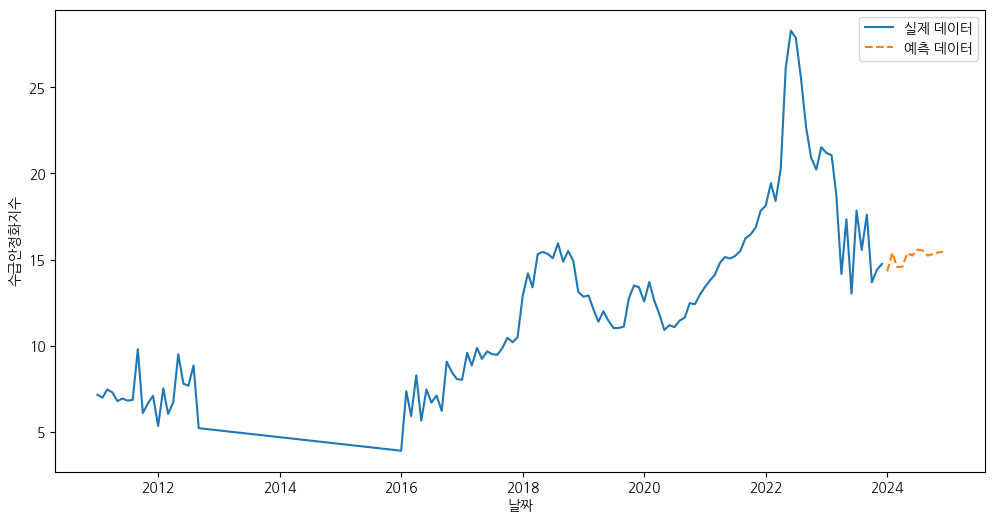

In [94]:
# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df.values, label='실제 데이터')
plt.plot(forecast.index, forecast, label='예측 데이터', linestyle='--')
plt.xlabel('날짜')
plt.ylabel('수급안정화지수')
plt.legend()
plt.show()


#### 예측값을 데이터에 추가

In [103]:
price_china_plus_forecast = pd.concat([price_china, forecast])
price_indonesia_plus_forecast = pd.concat([price_indonesia, forecast])

### 각 지표에 대해 이상탐지 (R Abnomality 패키지 활용)
* 중국과 인도네시아의 수출가격(니켈) : 기간별 가격(예측치 포함)에 대한 이상탐지
* 중국과 인도네시아의 수출량(니켈) : 기간별 수출량(예측치 포함)에 대한 이상탐지
* 국가별 수입량(니켈) : 국가별 수입량(예측치 포함)에 대한 이상탐지
* 수급안정화지수 : 예측치에 대한 이상탐지
* BDI : 예측치에 대한 이상탐지

In [ ]:
# 필요한 패키지 설치 및 로드
install.packages("devtools")
devtools::install_github("twitter/AnomalyDetection")
library(AnomalyDetection)

### 이상탐지 모델
* 각 지표에 대해 아래와 같은 평가점수를 부여
  * 이상없음 0 / 확인필요 1
* 확인필요한 지표수에 따라 구간별 위기코드 부여 (0이상없음 1경계 2주의 등)

## 활용데이터
* 분석 대상이 되는 데이터와 이에 대한 항목을 모두 작성
  * 공공데이터포털 수급안정화 지수
* 외부 데이터를 활용하였다면 그에 대한 세부적인 내용 기재 및 활용 이유 제시
  * Investing.com BDI지수
  * UN Comtrade 수출입현황

## 사업화방안 및 기대효과
* 사업화방안
* 제안 결과를 실행하여 얻을 수 있는 사회 파급(기대) 효과에 대해 구체적으로 작성


In [ ]:
## 

경제적 중요성과 서플라이 리스크
  수입운송도 
  병목

수급안정화지수는 직접 구하기 가능 (산식이 있음)

수급안정화지수를 모델 주요 지표 중 하나로 사용

주가분석 모델을 광물가격 등을 가지고 사용(트렌드 예측)

광물 왜 중요한지, 리스크 (배경조사)
  * 리튬 코발트 니켈 망간 텅스텐

광물별 공급리스트 판단
  * 대체제, 대체재의 생산량
  * 광물의 재사용 가능여부, 사용률
  * 

광물별 가격 영향 미치는 요소
  * 생산국의 상황 정량화 (정치, 등)

사용할 지표
  * 수급안정화지수
  * 시장위험지수

광물가격 급등 등 변동성, 국제시세, 주요 생산·수입국 현황, 수입량·수입금액·수입의존도,
국내 비축확보율, 재자원화율 및 국내 주요 수요기업 정보 등

한국자원정보 서비스 https://www.komis.or.kr/komis/price/mineralprice/the4thIndustry/pricetrend/coreMetals.do

화요일에는 모델에 대한 생각
  * 광물별? 전체?